In [80]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

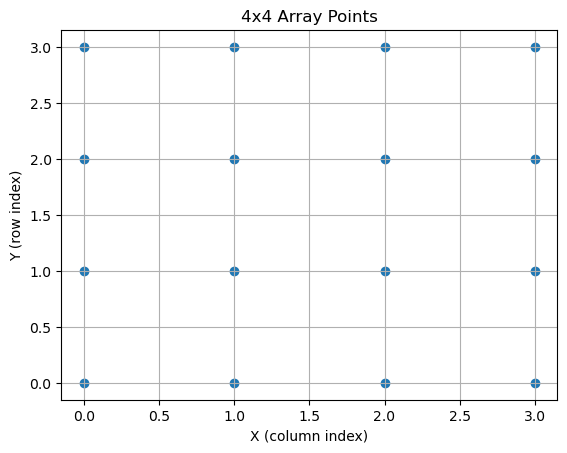

In [81]:
# 4x4 の 2 次元配列
arr = np.arange(16).reshape(4, 4)

# Y, X に行・列インデックスを格納
Y, X = np.indices(arr.shape)

# Y 軸を反転して、下から上に増えるようにする
# arr.shape[0] = 4 の場合、Y=0(上)を Y_new=3(下) に、Y=3(下)を Y_new=0(下) に変換
Y_new = (arr.shape[0]-1) - Y

# 散布図を描く (色指定なし)
plt.scatter(X.ravel(), Y_new.ravel())

plt.xlabel("X (column index)")
plt.ylabel("Y (row index)")
plt.title("4x4 Array Points")
plt.grid(True)
plt.show()

In [82]:
# 4x4 の点群を生成（左下(0,0)が最も小さな座標）
# X: 0～3, Y: 0～3で格子点を定義
size = 4
x_coords = np.arange(size)
y_coords = np.arange(size)

# 全点を (x,y) の形でリスト化
points = [(x, y) for y in y_coords for x in x_coords]
# pointsの並びは、y=0（下段）のx=0～3、その次にy=1（次の行）のx=0～3、といった順序
# [(0,0), (1,0), (2,0), (3,0),
#  (0,1), (1,1), (2,1), (3,1),
#   ...
#  (0,3), (1,3), (2,3), (3,3)]

# 距離行列を格納する配列（16x16）
n_points = len(points)
dist_matrix = np.zeros((n_points, n_points))

# 各点ペア間の距離を計算
for i in range(n_points):
    for j in range(n_points):
        x1, y1 = points[i]
        x2, y2 = points[j]
        dist_matrix[i, j] = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# 結果表示
print("Distance Matrix (16x16):")
print(dist_matrix)

Distance Matrix (16x16):
[[0.         1.         2.         3.         1.         1.41421356
  2.23606798 3.16227766 2.         2.23606798 2.82842712 3.60555128
  3.         3.16227766 3.60555128 4.24264069]
 [1.         0.         1.         2.         1.41421356 1.
  1.41421356 2.23606798 2.23606798 2.         2.23606798 2.82842712
  3.16227766 3.         3.16227766 3.60555128]
 [2.         1.         0.         1.         2.23606798 1.41421356
  1.         1.41421356 2.82842712 2.23606798 2.         2.23606798
  3.60555128 3.16227766 3.         3.16227766]
 [3.         2.         1.         0.         3.16227766 2.23606798
  1.41421356 1.         3.60555128 2.82842712 2.23606798 2.
  4.24264069 3.60555128 3.16227766 3.        ]
 [1.         1.41421356 2.23606798 3.16227766 0.         1.
  2.         3.         1.         1.41421356 2.23606798 3.16227766
  2.         2.23606798 2.82842712 3.60555128]
 [1.41421356 1.         1.41421356 2.23606798 1.         0.
  1.         2.         

In [83]:
# i, j インデックスとパラメータ beta をシンボルとして定義
i, j = sp.symbols('i j', real=True)
beta = sp.Symbol('beta', real=True)

# alpha_j, d_ijを関数として定義（実際にはalpha_jはjに依存、d_ijはi,jに依存する）
alpha_j = sp.Function('alpha')(j)
d_ij = sp.Function('d')(i, j)  # dist_matrix[i, j] に対応するシンボル

# w_ij の式定義
w_ij_expr = sp.exp(alpha_j - beta*d_ij)

# LaTeX表現の出力
#latex_expr = sp.latex(w_ij_expr)
print(w_ij_expr)

exp(-beta*d(i, j) + alpha(j))


In [84]:
# beta に 0.1 を代入
w_ij_expr = w_ij_expr.subs({beta: 0.1, alpha_j: 0})
print(w_ij_expr)

exp(-0.1*d(i, j))


In [85]:
J_L = [1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
print(len(J_L))

16


### one more

In [86]:
# 4x4格子点 (0,0) から (3,3) を定義
size = 4
x_coords = np.arange(size)
y_coords = np.arange(size)
points = [(x, y) for y in y_coords for x in x_coords]  # [(0,0), (1,0), ..., (3,3)]

# dist_matrix (16x16) を計算
# 2点間のユークリッド距離を計算
dist_matrix = np.zeros((len(points), len(points)))
for i in range(len(points)):
    for j in range(len(points)):
        x1, y1 = points[i]
        x2, y2 = points[j]
        dist_matrix[i, j] = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

print(dist_matrix)

[[0.         1.         2.         3.         1.         1.41421356
  2.23606798 3.16227766 2.         2.23606798 2.82842712 3.60555128
  3.         3.16227766 3.60555128 4.24264069]
 [1.         0.         1.         2.         1.41421356 1.
  1.41421356 2.23606798 2.23606798 2.         2.23606798 2.82842712
  3.16227766 3.         3.16227766 3.60555128]
 [2.         1.         0.         1.         2.23606798 1.41421356
  1.         1.41421356 2.82842712 2.23606798 2.         2.23606798
  3.60555128 3.16227766 3.         3.16227766]
 [3.         2.         1.         0.         3.16227766 2.23606798
  1.41421356 1.         3.60555128 2.82842712 2.23606798 2.
  4.24264069 3.60555128 3.16227766 3.        ]
 [1.         1.41421356 2.23606798 3.16227766 0.         1.
  2.         3.         1.         1.41421356 2.23606798 3.16227766
  2.         2.23606798 2.82842712 3.60555128]
 [1.41421356 1.         1.41421356 2.23606798 1.         0.
  1.         2.         1.41421356 1.         1.4

In [87]:
# パラメータ
beta = 0.1
alpha = 0.0  # alpha_j = 0

# dist_matrix にはpoints[i]とpoints[j]のユークリッド距離が格納されている
w = np.exp(-beta * dist_matrix)
# print(f"w = {w}")
print(f"w.shape = {w.shape}")


w.shape = (16, 16)


In [88]:
def cal_sum_w_ij(w, X):
    """
    引数:
        w: ndarray of shape (|I|, |J|) w_ij
        X: バイナリ値のリスト (ndarray, shape=(|J|,))

    戻り値:
        sum_w_ij: ndarray of shape (|J|,) 各 j に対して \sum_{i \in X} w_{ij} の計算結果
    """
    sum_w_ij = np.dot(X, w.T)
    return sum_w_ij

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\adachi\AppData\Local\Temp\ipykernel_13988\273411475.py:2: SyntaxWarning: invalid escape sequence '\s'
  """


In [ ]:
def cal_sum_w_ij_XY(w, X, Y):
    """
    引数:
        w: ndarray of shape (|I|, |J|) w_ij
        X: バイナリ値のリスト (ndarray, shape=(|J|,))
        Y: バイナリ値のリスト (ndarray, shape=(|J|,))

    戻り値:
        sum_w_ij_XY: ndarray of shape (|I|,) 各 i に対して \sum_{j \in X \cup Y} w_{ij} の計算結果
    """
    # X と Y の和集合を計算
    X_union_Y = np.logical_or(X, Y).astype(int)
    
    # 各 i に対して \sum_{j \in X \cup Y} w_{ij} を計算
    sum_w_ij_XY = cal_sum_w_ij(w, X_union_Y)
    
    return sum_w_ij_XY

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'


[ 6 15 24]


C:\Users\adachi\AppData\Local\Temp\ipykernel_13988\2248732097.py:2: SyntaxWarning: invalid escape sequence '\s'
  """


In [90]:
def cal_U_L(dist_matrix, beta, J_L):
    # w_ij = exp(-beta * d_ij) (alpha_j=0なので簡略化)
    w = np.exp(-beta * dist_matrix)  # wは16x16
    print(w.shape)

    # U_i^L = Σ_j∈J_L w_ij = w[i,j] を J_L[j]==1 のところだけ合計
    # J_Lが1となっている列のみ抽出し合計
    U_L = (w * J_L).sum(axis=1)
    return U_L


In [91]:
def cal_U_F(dist_matrix, beta, J_F):
    # w_ij = exp(-beta * d_ij) (alpha_j=0なので簡略化)
    w = np.exp(-beta * dist_matrix)  # wは16x16
    print(w.shape)

    # U_i^F = Σ_j∈J_F w_ij = w[i,j] を J_F[j]==1 のところだけ合計
    # J_Fが1となっている列のみ抽出し合計
    U_F = (w * J_F).sum(axis=1)
    return U_F

In [92]:
def cal_f_i_Y(U_i_L, U_i_F, sum_w_i_X, sum_w_i_X_Y):
    """
    引数:
        U_i_L: ndarray of shape (|I|,) U_i^L
        U_i_F: ndarray of shape (|I|,) U_i^F
        sum_w_i_X: ndarray of shape (|I|,) Σ_j w_ij * X_j
        sum_w_i_X_Y: ndarray of shape (|I|,) Σ_j w_ij * (X_j + Y_j)

    戻り値:
        f_i_Y: ndarray of shape (|I|,) 各 i に対して f_{i, Y}(X) の計算結果
    """
    f_i_Y = (U_i_L + sum_w_i_X) / (U_i_L + U_i_F + sum_w_i_X_Y)
    return f_i_Y

In [100]:
X = np.array([1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0])
Y = np.array([0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0])

# alphaが０なので関係ない
U_i_L = 0
U_i_F = 0

# Ensure w has the correct shape
w = np.exp(-beta * dist_matrix)

sum_w_i_X = cal_sum_w_ij(w, X)
sum_w_i_X_Y = cal_sum_w_ij_XY(w, X, Y)

f_i_Y = cal_f_i_Y(U_i_L, U_i_F, sum_w_i_X, sum_w_i_X_Y)
print(f_i_Y)


[0.51634453 0.50020851 0.49887306 0.48572004 0.515029   0.49643577
 0.49477971 0.48656146 0.51125019 0.49178298 0.48366438 0.48355596
 0.50417127 0.49342362 0.48595295 0.48322665]


In [72]:
# 初期値を求めるのに使う
def cul_alpha_n_beta(incum_x, h, U_L, U_F, w):
    """
    引数:
        incum_x: ndarray of shape (|J|,) インカンベント解 x_j
        h: ndarray of shape (|I|,) 重み h_i
        U_L: ndarray of shape (|I|,) U_i^L
        U_F: ndarray of shape (|I|,) U_i^F
        w: ndarray of shape (|I|, |J|) w_ij

    戻り値:
        alpha: スカラー値 alpha(x)
        beta: ndarray of shape (|J|,) beta_j(x)
        sorted_indices: beta_j(x)に従ってソートされた j のインデックス
    """
    print(w.shape)
    I_size = len(h)
    J_size = len(incum_x)
    x = incum_x

    # a_i(x) = U_i^L + sum_j w_ij * x_j
    a = U_L + (w * x).sum(axis=1)

    # w_i^L(x) と w_i^U(x) の計算
    # w_i^L(x) = U_i^F + Σ_{j : w_ij(1-x_j)<0} w_ij(1-x_j)
    # w_i^U(x) = U_i^F + Σ_{j : w_ij(1-x_j)>0} w_ij(1-x_j)
    w_i_L_vals = np.zeros(I_size)
    w_i_U_vals = np.zeros(I_size)

    one_minus_x = 1 - x

    for i in range(I_size):
        # 抽出
        val = w[i,:] * one_minus_x
        # 最小化の場合w_i^L:
        # w_ij(1-x_j) < 0 なら y_j=1でその値を加算、それ以外はy_j=0で加算なし
        negative_indices = val < 0
        w_i_L_vals[i] = U_F[i] + val[negative_indices].sum()

        # 最大化の場合w_i^U:
        # w_ij(1-x_j) > 0 なら y_j=1でその値を加算、それ以外はy_j=0で加算なし
        positive_indices = val > 0
        w_i_U_vals[i] = U_F[i] + val[positive_indices].sum()

    # alpha(x)の計算
    # alpha(x)=Σ_i h_i [a_i(x)*(a_i(x)+w_i^U(x)+w_i^L(x)-U_i^F) / ((a_i(x)+w_i^U(x))*(a_i(x)+w_i^L(x)))]
    numerator = a * (a + w_i_U_vals + w_i_L_vals - U_F)
    denominator = (a + w_i_U_vals)*(a + w_i_L_vals)
    alpha = (h * (numerator / denominator)).sum()

    # beta_j(x)の計算
    # beta_j(x)=Σ_i h_i [ a_i(x)*w_ij(1-x_j)/((a_i(x)+w_i^U(x))*(a_i(x)+w_i^L(x))) ]
    beta = np.zeros(J_size)
    for j in range(J_size):
        val_j = w[:, j] * (one_minus_x[j])
        beta_j_numerators = a * val_j
        beta_j_denominators = (a + w_i_U_vals)*(a + w_i_L_vals)
        beta[j] = (h * (beta_j_numerators / beta_j_denominators)).sum()

    # beta_j(x) に従ってソート
    # 大きい順で並べる
    sorted_indices = np.argsort(-beta)  # 降順ソート

    return alpha, beta, sorted_indices

In [73]:
def solve_min_problem(incum_x, h, U_L, U_F, w, r):
    """
    引数:
        incum_x: 既知の x^ (ndarray, shape=(|J|,))
        h:       重み h_i (ndarray, shape=(|I|,))
        U_L:     U_i^L (ndarray, shape=(|I|,))
        U_F:     U_i^F (ndarray, shape=(|I|,))
        w:       w_{ij} (ndarray, shape=(|I|, |J|))
        r:       制約 e^T y = r における r (int)

    戻り値:
        optimal_value:  最小値 (α(x^) - β(x^)^T y)
        y_star:         最適解 y (ndarray, shape=(|J|,))
    """
    alpha, beta, sorted_indices = cul_alpha_n_beta(incum_x, h, U_L, U_F, w)

    # top r のインデックスを1、それ以外を0にする
    y_star = np.zeros_like(beta)
    top_r_indices = sorted_indices[:r]
    y_star[top_r_indices] = 1

    # 最小値を計算
    # min_y {α - β^T y} = α - max_y {β^T y}, 
    # max_y {β^T y} は top r の β_j の合計
    beta_sum_top_r = beta[top_r_indices].sum()
    optimal_value = alpha - beta_sum_top_r

    return optimal_value, y_star

In [74]:
# !pip install pulp
from pulp import LpProblem, LpMaximize, LpVariable, lpSum

In [75]:
J_size = len(points)
I_size = len(points) 
h = np.ones(I_size) / I_size
p = 4
r = 4

# 問題定義
prob_1 = [LpProblem("Max_theta", LpMaximize)]

# 変数定義
# x_j は [0,1]の範囲、θ も [0,1]の範囲
x = [LpVariable(f"x_{j}", lowBound=0, upBound=1) for j in range(J_size)]
theta = LpVariable("theta", lowBound=0, upBound=1)

while prob_1:
    prob = prob_1.pop()
    
    # 目的関数
    prob += theta, "Maximize_theta"

    # 制約: e^T x = p (x_jをすべて足してp)
    prob += lpSum(x) == p, "sum_of_x_equals_p"

    # 問題を解く
    prob.solve()

    # 結果表示
    print("Status:", prob.status)
    print("theta =", theta.varValue)
    for j in range(J_size):
        print(f"x_{j} = {x[j].varValue}")
        
    incum_theta = theta
    incum_x = np.array([var.varValue for var in x], dtype=float)
    
    optimal_val, incum_y = solve_min_problem(incum_x, h, U_L, U_F, w, r)
    print(optimal_val)
    print(f"incum_y : {incum_y}")
    print(f"incum_x : {incum_x}")

Status: 1
theta = 1.0
x_0 = 1.0
x_1 = 1.0
x_2 = 0.0
x_3 = 0.0
x_4 = 0.0
x_5 = 0.0
x_6 = 0.0
x_7 = 0.0
x_8 = 0.0
x_9 = 0.0
x_10 = 1.0
x_11 = 1.0
x_12 = 0.0
x_13 = 0.0
x_14 = 0.0
x_15 = 0.0
(16, 16)
0.5246409329803177
incum_y : [0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
incum_x : [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
